In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [4]:
season = ""
episode = ""
scene = ""
data = []
with open("data/all_scripts.txt") as f:
    for line in f.readlines():
        line = line[:-1]
        if line.startswith(">> "):
            season = int(line[10:12])
            episode = line[3:]
            continue
        if line.startswith("> "):
            scene = line[2:]
            continue
        character, line = line.split(": ", 1)
        data.append([season, episode, scene, character, line])
lines = pd.DataFrame(data, columns=["Season", "Episode", "Scene", "Character", "Line"])


In [5]:
lines.groupby(["Season", "Episode", "Scene"]).count().reset_index().groupby("Season").count()[["Scene"]]

,Scene
Season,
1,157
2,205
3,193
4,219
5,198
6,211
7,207
8,191
9,177


**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [6]:
lines_per_chars = lines.groupby("Character").count()[["Line"]]
recurrent_chars = lines_per_chars[lines_per_chars["Line"] > 90]
recurrent_chars = recurrent_chars.drop('Man', axis = 0)
print("Number of recurrent characters: {}".format(len(recurrent_chars)))
print(recurrent_chars)

Number of recurrent characters: 19
               Line
Character          
Amy            3472
Arthur          130
Bernadette     2690
Bert             95
Beverley        162
Emily           164
Howard         5872
Kripke          106
Leonard        9829
Leslie          116
Mrs Cooper      213
Mrs Wolowitz    136
Penny          7677
Priya           222
Raj            4779
Sheldon       11689
Stuart          733
Wil             126
Zack            135


In [7]:
recurrent_chars = recurrent_chars.drop("Man", axis=0)
recurrent_chars

KeyError: "['Man'] not found in axis"

## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [8]:
def clean_line(line):
    for char in EXCLUDE_CHARS:
        line = line.replace(char, ' ')
    return line.lower()
lines["Line"] = lines["Line"].apply(clean_line)
lines.head()

,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me
4,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,hang on


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

<Axes: title={'center': 'Frequency histogram (loglog scale)'}, ylabel='Frequency'>

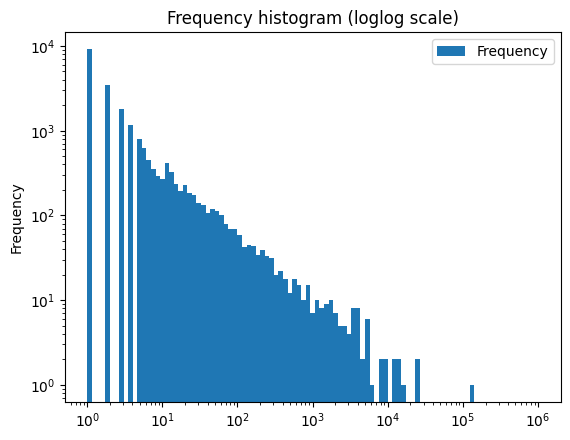

In [9]:
corpus_frequency = pd.concat([pd.Series(row['Line'].split(' ')) for _, row in lines.iterrows()]).reset_index()
corpus_frequency.columns = ["Frequency", "Word"]
corpus_frequency = corpus_frequency.groupby("Word").count()
corpus_frequency.plot.hist(column=["Frequency"], loglog=True, bins=np.logspace(0, 6, 100), title="Frequency histogram (loglog scale)")


### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [11]:
lines["Words"] = lines["Line"].apply(lambda x: len(x.split()))
words_per_char = lines.groupby("Character").sum()["Words"]
words_per_char[recurrent_chars.index]


Character
Amy              39933
Arthur            1451
Bernadette       27726
Bert              1146
Beverley          2029
Emily             1571
Howard           69505
Kripke            1246
Leonard         102496
Leslie            1249
Mrs Cooper        3389
Mrs Wolowitz      1459
Penny            79270
Priya             1940
Raj              60099
Sheldon         185388
Stuart            7955
Wil               1678
Zack              1427
Name: Words, dtype: int64

In [12]:
print("Most talkative character: ", words_per_char[recurrent_chars.index].idxmax())

Most talkative character:  Sheldon


**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [15]:
lines.head()

,Season,Episode,Scene,Character,Line,Words
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...,57
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point,5
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...,16
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me,2
4,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,hang on,2


In [42]:
filtered_lines = lines[lines["Character"].isin(recurrent_chars.index)]

words_per_episode = filtered_lines.groupby(['Character', 'Season', 'Episode']).sum()["Words"]

words_per_episode


Character  Season  Episode                                            
Amy        3       Series 03 Episode 23 – The Lunar Excitation            103
           4       Series 04 Episode 01 – The Robotic Manipulation        143
                   Series 04 Episode 03 – The Zazzy Substitution          473
                   Series 04 Episode 05 – The Desperation Emanation       229
                   Series 04 Episode 08 – The 21 Second Excitation        602
                                                                         ... 
Zack       4       Series 04 Episode 17 – The Toast Derivation            153
           7       Series 07 Episode 09 – The Thanksgiving Decoupling     126
                   Series 07 Episode 11 – The Cooper Extraction            17
           9       Series 09 Episode 22 – The Fermentation Bifurcation    218
           10      Series 10 Episode 22 – The Cognition Regeneration      282
Name: Words, Length: 1641, dtype: int64

In [41]:
robust_summary = words_per_episode.agg(
    median=np.median,
    mean=np.mean,
    std=np.std
)

robust_summary



C:\Users\Admin\AppData\Local\Temp\ipykernel_22720\2618559386.py:1: FutureWarning: The provided callable <function median at 0x000001AACFAFE9D0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  robust_summary = words_per_episode.agg(
C:\Users\Admin\AppData\Local\Temp\ipykernel_22720\2618559386.py:1: FutureWarning: The provided callable <function mean at 0x000001AACE9F5A60> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  robust_summary = words_per_episode.agg(
C:\Users\Admin\AppData\Local\Temp\ipykernel_22720\2618559386.py:1: FutureWarning: The provided callable <function std at 0x000001AACE9F5B80> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" i

median    292.000000
mean      360.120049
std       267.262431
Name: Words, dtype: float64

### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

In [66]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import CountVectorizer
from scipy.sparse import csr_matrix
# Initialize Spark
sc = SparkContext("local", "BagOfWordsScript")
spark = SparkSession(sc)

# Assuming 'raw_input_file' is the path to the raw input file
# and 'recurrent_characters' is a list of recurrent characters

# Read the raw input file into an RDD
raw_rdd = sc.textFile(raw_input_file)

# Filter lines for recurrent characters
filtered_rdd = raw_rdd.filter(lambda line: any(char in line for char in recurrent_characters))

# Split lines into (speaker, dialogue line) pairs
speaker_dialogue_rdd = filtered_rdd.map(lambda line: (line.split('\t')[3], line.split('\t')[4]))

# Create a DataFrame for CountVectorizer
df = speaker_dialogue_rdd.toDF(["Speaker", "Dialogue"])

# Use CountVectorizer to generate bag of words vectors
cv = CountVectorizer(inputCol="Dialogue", outputCol="BOW_Vector")
cv_model = cv.fit(df)
df_bow = cv_model.transform(df)

# Convert bag of words vectors to scipy CSR matrices
def to_csr_matrix(row):
    speaker, bow_vector = row
    return speaker, csr_matrix(bow_vector.toArray())

bow_rdd = df_bow.select("Speaker", "BOW_Vector").rdd.map(to_csr_matrix)

# Aggregate bag of words vectors for each speaker
aggregated_bow_rdd = bow_rdd.reduceByKey(lambda x, y: x + y)

# Collect and print the result
result = aggregated_bow_rdd.collect()
for speaker, aggregated_vector in result:
    print(f"Speaker: {speaker}, Aggregated Bag of Words Vector: {aggregated_vector}")

# Stop Spark
sc.stop()

NameError: name 'raw_input_file' is not defined

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [44]:
import re

filtered_lines = lines[lines["Character"].isin(recurrent_chars.index)]
filtered_lines = filtered_lines[filtered_lines["Character"].str.split().apply(len) == 1]

# Step 2: Define a function to identify if a line contains gossip
def contains_gossip(line, character):
    return re.search(rf'\b{character}\b', line, flags=re.IGNORECASE) is not None

# Step 3: Apply the function to each line to create a new column indicating whether gossip occurs
for character in recurrent_chars.index:
    filtered_lines[f'{character}_gossip'] = filtered_lines.apply(lambda row: contains_gossip(row['Line'], character), axis=1)

# Step 4: Count the number of gossips for each character
gossip_counts = filtered_lines.groupby('Character')[[f'{character}_gossip' for character in recurrent_chars.index]].sum()

# Display the result
print(gossip_counts)

            Amy_gossip  Arthur_gossip  Bernadette_gossip  Bert_gossip  \
Character                                                               
Amy                 23              2                 52           15   
Arthur               1              1                  0            0   
Bernadette          38              0                  5            1   
Bert                 4              0                  0            2   
Beverley             2              0                  0            0   
Emily                0              0                  0            0   
Howard              21              0                102            3   
Kripke               0              0                  0            0   
Leonard             70              4                 32            6   
Leslie               0              0                  0            0   
Penny              132              2                 52            6   
Priya                0              0              

In [45]:
import networkx as nx
familiarity_graph = nx.Graph()

# Step 3: Add nodes for each recurrent character
familiarity_graph.add_nodes_from(recurrent_chars.index)

# Step 4: Iterate through scenes and update the graph with edges and weights
for scene, scene_group in filtered_lines.groupby(['Season', 'Episode', 'Scene']):
    characters_in_scene = scene_group['Character'].tolist()

    # Update the graph with edges and weights
    for char1 in characters_in_scene:
        for char2 in characters_in_scene:
            if char1 != char2:
                # Check if the edge already exists
                if familiarity_graph.has_edge(char1, char2):
                    # Increment the weight
                    familiarity_graph[char1][char2]['weight'] += 1
                else:
                    # Add a new edge with weight 1
                    familiarity_graph.add_edge(char1, char2, weight=1)

# Display the graph
print("Nodes:", familiarity_graph.nodes())
print("Edges:", familiarity_graph.edges(data=True))

Nodes: ['Amy', 'Arthur', 'Bernadette', 'Bert', 'Beverley', 'Emily', 'Howard', 'Kripke', 'Leonard', 'Leslie', 'Mrs Cooper', 'Mrs Wolowitz', 'Penny', 'Priya', 'Raj', 'Sheldon', 'Stuart', 'Wil', 'Zack']
Edges: [('Amy', 'Sheldon', {'weight': 78392}), ('Amy', 'Raj', {'weight': 15260}), ('Amy', 'Howard', {'weight': 11396}), ('Amy', 'Penny', {'weight': 51428}), ('Amy', 'Leonard', {'weight': 36194}), ('Amy', 'Bernadette', {'weight': 21870}), ('Amy', 'Zack', {'weight': 1136}), ('Amy', 'Priya', {'weight': 158}), ('Amy', 'Stuart', {'weight': 3386}), ('Amy', 'Wil', {'weight': 586}), ('Amy', 'Arthur', {'weight': 218}), ('Amy', 'Bert', {'weight': 2088}), ('Amy', 'Emily', {'weight': 318}), ('Amy', 'Kripke', {'weight': 52}), ('Amy', 'Leslie', {'weight': 36}), ('Amy', 'Beverley', {'weight': 394}), ('Arthur', 'Sheldon', {'weight': 4522}), ('Arthur', 'Leonard', {'weight': 2058}), ('Arthur', 'Penny', {'weight': 1266}), ('Arthur', 'Howard', {'weight': 96}), ('Arthur', 'Raj', {'weight': 72}), ('Bernadette',

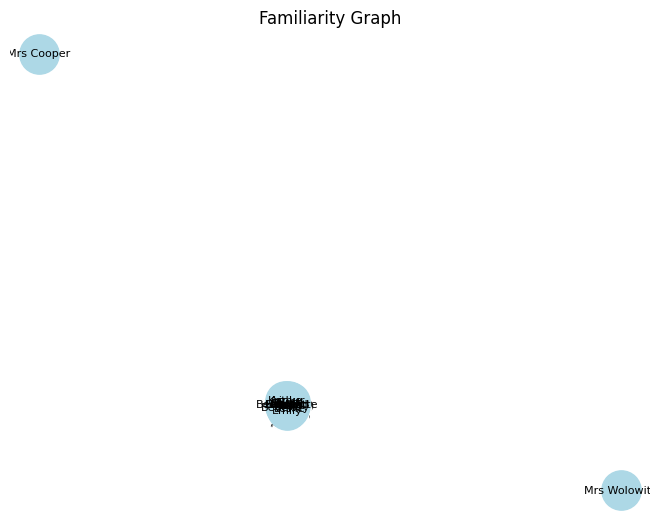

In [46]:
pos = nx.spring_layout(familiarity_graph)  # Choose a layout algorithm
labels = nx.get_edge_attributes(familiarity_graph, 'weight')
nx.draw(familiarity_graph, pos, with_labels=True, font_size=8, node_size=800, node_color='lightblue')
nx.draw_networkx_edge_labels(familiarity_graph, pos, edge_labels=labels)

plt.title("Familiarity Graph")
plt.show()

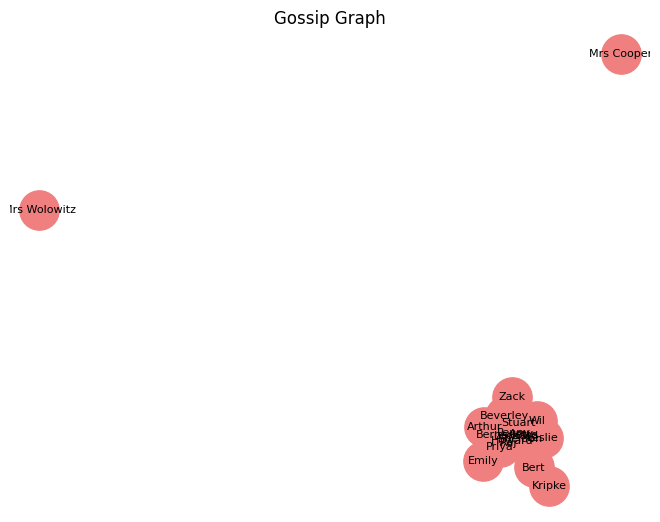

In [47]:
gossip_graph = nx.DiGraph()

# Step 2: Add nodes for each recurrent character
gossip_graph.add_nodes_from(recurrent_chars.index)

# Step 3: Iterate through lines and update the graph with directed edges and weights
for _, row in filtered_lines.iterrows():
    character = row['Character']
    
    # Update the graph with directed edges and weights
    for gossip_target in recurrent_chars.index:
        if row[f'{gossip_target}_gossip']:
            # Check if the edge already exists
            if gossip_graph.has_edge(character, gossip_target):
                # Increment the weight
                gossip_graph[character][gossip_target]['weight'] += 1
            else:
                # Add a new directed edge with weight 1
                gossip_graph.add_edge(character, gossip_target, weight=1)

# Step 4: Display the graph
pos = nx.spring_layout(gossip_graph)  # Choose a layout algorithm
labels = nx.get_edge_attributes(gossip_graph, 'weight')
nx.draw(gossip_graph, pos, with_labels=True, font_size=8, node_size=800, node_color='lightcoral', arrowsize=12)
nx.draw_networkx_edge_labels(gossip_graph, pos, edge_labels=labels)

plt.title("Gossip Graph")
plt.show()

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

In [49]:
    # Check if the graph is connected
    is_connected = nx.is_connected(familiarity_graph)

    if is_connected:
        # Calculate the diameter of the familiarity graph
        diameter = nx.diameter(familiarity_graph)
    
    # Check if every character is familiar with everyone else through at most one intermediary
    is_true = diameter == 1

    # Print the result
    if is_true:
        print("Sheldon's claim is true.")
    else:
        print(f"Sheldon's claim is not true. At most {diameter} intermediaries are needed.")
else:
    print("The familiarity graph is not connected. Analyze connected components or take other actions.")

The familiarity graph is not connected. Analyze connected components or take other actions.


**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [50]:
betweenness_centrality = nx.betweenness_centrality(familiarity_graph)

# Find the character with the highest betweenness centrality
max_betweenness_char = max(betweenness_centrality, key=betweenness_centrality.get)
max_betweenness_value = betweenness_centrality[max_betweenness_char]

# Print the result
print(f"The character with the highest betweenness centrality is '{max_betweenness_char}' with a value of {max_betweenness_value}.")

The character with the highest betweenness centrality is 'Amy' with a value of 0.03413217138707335.


**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

In [51]:
# Calculate the number of nodes and edges in the gossip graph
num_nodes = len(gossip_graph.nodes)
num_edges = len(gossip_graph.edges)

# Check if the gossip graph is complete
is_complete = num_edges == num_nodes * (num_nodes - 1)

# Print the result
if is_complete:
    print("The gossip graph possesses the property of a complete graph.")
else:
    print("The gossip graph does not possess the property of a complete graph.")

# Check if for every pair of recurrent characters, at least one gossips about the other
for char1 in gossip_graph.nodes:
    for char2 in gossip_graph.nodes:
        if char1 != char2:
            if not gossip_graph.has_edge(char1, char2) and not gossip_graph.has_edge(char2, char1):
                print(f"Not every pair of recurrent characters has at least one gossip edge. Character {char1} and {char2} do not have a gossip edge between them.")

The gossip graph does not possess the property of a complete graph.
Not every pair of recurrent characters has at least one gossip edge. Character Amy and Emily do not have a gossip edge between them.
Not every pair of recurrent characters has at least one gossip edge. Character Amy and Leslie do not have a gossip edge between them.
Not every pair of recurrent characters has at least one gossip edge. Character Amy and Mrs Cooper do not have a gossip edge between them.
Not every pair of recurrent characters has at least one gossip edge. Character Amy and Mrs Wolowitz do not have a gossip edge between them.
Not every pair of recurrent characters has at least one gossip edge. Character Arthur and Bernadette do not have a gossip edge between them.
Not every pair of recurrent characters has at least one gossip edge. Character Arthur and Bert do not have a gossip edge between them.
Not every pair of recurrent characters has at least one gossip edge. Character Arthur and Beverley do not have 

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

In [52]:
for char1 in familiarity_graph.nodes:
    for char2 in familiarity_graph.nodes:
        if char1 != char2:
            # Check if there is an edge in the familiarity graph
            if familiarity_graph.has_edge(char1, char2):
                # If there is an edge, check if there is a directed edge from char1 to char2 in the gossip graph
                if not gossip_graph.has_edge(char1, char2):
                    print(f"Error: There is an edge in the familiarity graph between {char1} and {char2}, but no directed edge from {char1} to {char2} in the gossip graph.")
            else:
                # If there is no edge, make sure there is no directed edge from char1 to char2 in the gossip graph
                if gossip_graph.has_edge(char1, char2):
                    print(f"Error: There is no edge in the familiarity graph between {char1} and {char2}, but there is a directed edge from {char1} to {char2} in the gossip graph.")

Error: There is an edge in the familiarity graph between Amy and Beverley, but no directed edge from Amy to Beverley in the gossip graph.
Error: There is an edge in the familiarity graph between Amy and Emily, but no directed edge from Amy to Emily in the gossip graph.
Error: There is an edge in the familiarity graph between Amy and Leslie, but no directed edge from Amy to Leslie in the gossip graph.
Error: There is an edge in the familiarity graph between Arthur and Howard, but no directed edge from Arthur to Howard in the gossip graph.
Error: There is an edge in the familiarity graph between Arthur and Penny, but no directed edge from Arthur to Penny in the gossip graph.
Error: There is an edge in the familiarity graph between Arthur and Raj, but no directed edge from Arthur to Raj in the gossip graph.
Error: There is no edge in the familiarity graph between Bernadette and Bert, but there is a directed edge from Bernadette to Bert in the gossip graph.
Error: There is an edge in the f

## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [57]:
train_set = lines[lines["Season"] <= lines["Season"].max() - 2]
train_set.head()

,Season,Episode,Scene,Character,Line,Words
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...,57
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point,5
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...,16
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me,2
4,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,hang on,2


In [58]:
test_set = lines[lines["Season"] > lines["Season"].max() - 2]
test_set.head()

,Season,Episode,Scene,Character,Line,Words
40354,9,Series 09 Episode 01 – The Matrimonial Momentum,A Wedding Chapel.,Penny,so what package are you thinking,6
40355,9,Series 09 Episode 01 – The Matrimonial Momentum,A Wedding Chapel.,Leonard,mm this one comes with music and flowers oh ...,19
40356,9,Series 09 Episode 01 – The Matrimonial Momentum,A Wedding Chapel.,Penny,why would we want that,5
40357,9,Series 09 Episode 01 – The Matrimonial Momentum,A Wedding Chapel.,Leonard,‘cause there s a lot of gorgeous blondes out t...,26
40358,9,Series 09 Episode 01 – The Matrimonial Momentum,A Wedding Chapel.,Penny,whatever put us on the internet i ve always ...,16


**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [59]:
words_for_chars = pd.concat([pd.Series(row["Character"], row['Line'].split())
                             for _, row in train_set.iterrows()]).reset_index()
words_for_chars.columns = ["Word", "Character"]

words_for_chars = words_for_chars.groupby("Word")["Character"].apply(set)
sheldon_words = words_for_chars[words_for_chars.apply(lambda x: ("Sheldon" in x) and (len(x) == 1))].index

In [60]:
def contains_sheldon_words(line):
    for word in sheldon_words:
        if word in line.split():
            return True
    return False
test_pred = test_set["Line"].apply(contains_sheldon_words)
test_true = test_set["Character"] == "Sheldon"

In [61]:
print("Accuracy: ", (test_true == test_pred).sum() / len(test_true))

Accuracy:  0.7825013713658804


**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def simple_tokenizer(text):
    return text.split()

def remove_stopwords(text):
    stop_words = set(open("helpers/stopwords.txt").read().split())
    return " ".join([word for word in text.split() if word not in stop_words])

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(tokenizer=simple_tokenizer, preprocessor=remove_stopwords, min_df=2)

# Fit and transform the TF-IDF matrix for the training set
X_train_tfidf = vectorizer.fit_transform(train_set["Line"])

# Perform singular value decomposition (SVD) and calculate a 25-dimensional approximation
svd = TruncatedSVD(n_components=25)
X_train_svd = svd.fit_transform(X_train_tfidf)

# Train a logistic regression classifier with 10-fold cross-validation
clf = LogisticRegressionCV(cv=10)
y_train = (train_set["Character"] == "Sheldon").astype(int)
y_train_pred = cross_val_predict(clf, X_train_svd, y_train, cv=10, method='predict_proba')[:, 1]

# Evaluate the classifier on the training set
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
accuracy_train = accuracy_score(y_train, y_train_pred_binary)
precision_train = precision_score(y_train, y_train_pred_binary)
recall_train = recall_score(y_train, y_train_pred_binary)
f1_train = f1_score(y_train, y_train_pred_binary)

# Transform the TF-IDF matrix for the test set using the same vectorizer
X_test_tfidf = vectorizer.transform(test_set["Line"])

# Perform SVD on the test set
X_test_svd = svd.transform(X_test_tfidf)

# Train the logistic regression classifier on the entire training set
clf.fit(X_train_svd, y_train)

# Predict the probabilities on the test set
y_test_pred = clf.predict_proba(X_test_svd)[:, 1]

# Evaluate the classifier on the test set
y_test = (test_set["Character"] == "Sheldon").astype(int)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_test_pred_binary)
precision_test = precision_score(y_test, y_test_pred_binary)
recall_test = recall_score(y_test, y_test_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)

# Print the results
print("Training Set Evaluation:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Set Evaluation:
Accuracy: 0.7658
Precision: 0.6154
Recall: 0.0008
F1-Score: 0.0017

Test Set Evaluation:
Accuracy: 0.7955
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
results_df = pd.DataFrame({
    'Line': test_set['Line'],
    'True_Label': y_test,
    'Predicted_Probability': y_test_pred
})

# Add a column for predicted labels based on a threshold (e.g., 0.5)
threshold = 0.5
results_df['Predicted_Label'] = (results_df['Predicted_Probability'] > threshold).astype(int)

# Identify false positives and false negatives
false_positives = results_df[(results_df['Predicted_Label'] == 1) & (results_df['True_Label'] == 0)].sort_values(by='Predicted_Probability', ascending=False).head(10)
false_negatives = results_df[(results_df['Predicted_Label'] == 0) & (results_df['True_Label'] == 1)].sort_values(by='Predicted_Probability', ascending=False).head(10)

# Print the most extreme false positives and false negatives
print("Most Extreme False Positives:")
print(false_positives[['Line', 'True_Label', 'Predicted_Probability']])

print("\nMost Extreme False Negatives:")
print(false_negatives[['Line', 'True_Label', 'Predicted_Probability']])

Most Extreme False Positives:
Empty DataFrame
Columns: [Line, True_Label, Predicted_Probability]
Index: []

Most Extreme False Negatives:
                                                    Line  True_Label  \
47332                                           leonard            1   
40923                                           leonard            1   
45772                                  leonard  leonard            1   
43385   knock  knock  knock  leonard and penny   knoc...           1   
48427  you re right  i have leonard and howard and ra...           1   
45016   knock  knock  knock  leonard   knock  knock  ...           1   
42179                                             hello            1   
42722                                             hello            1   
41415                                             hello            1   
47441                                             hello            1   

       Predicted_Probability  
47332               0.235598  
40923  

In [64]:
unit_vectors = svd.components_

# Find the most important feature (dominant singular vector)
most_important_feature = unit_vectors[0]

# Get the indices of the top 5 words in the most important feature
top_words_indices = most_important_feature.argsort()[-5:][::-1]

# Get the words associated with the top 5 indices
feature_words = vectorizer.get_feature_names_out()
top_words = [feature_words[i] for i in top_words_indices]

# Print the most important feature and the top 5 words
print("Most Important Feature:")
print(most_important_feature)

print("\nTop 5 Words in the Most Important Feature:")
print(top_words)

Most Important Feature:
[0.00042248 0.00023005 0.00116    ... 0.00031526 0.00481825 0.00010243]

Top 5 Words in the Most Important Feature:
['hey', 'sheldon', 'know', 'well', 'right']


In the context of Singular Value Decomposition (SVD) on the TF-IDF matrix, the most important feature in the model corresponds to the dominant singular vector associated with the highest singular value. 